This shouldn't be too difficult, but we need to just see what we're doing. So, let's figure it out.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc_context

In [66]:
class PlotCustomizer:
    def __init__(
            self, 
            axes: plt.Axes, 
            title: str = "", 
            xlabel: str = "", 
            ylabel: str = "", 
            zlabel: str = "",
            xlim = None,
            ylim = None,
            zlim = None,
            grid: bool = False):
        
        self._custom_rc_params = {
            'font.family': 'serif',
            'mathtext.fontset': 'cm', # https://matplotlib.org/stable/gallery/text_labels_and_annotations/mathtext_fontfamily_example.html
            'xtick.direction': 'in',
            'xtick.major.size': 5,
            'xtick.major.width': 0.5,
            'xtick.minor.size': 2.5,
            'xtick.minor.width': 0.5,
            'xtick.minor.visible': True,
            'xtick.top': True,
            'ytick.direction': 'in',
            'ytick.major.size': 5,
            'ytick.major.width': 0.5,
            'ytick.minor.size': 2.5,
            'ytick.minor.width': 0.5,
            'ytick.minor.visible': True,
            'ytick.right': True,
        }

        self.axes_object = axes
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.zlabel = zlabel
        self.xlim = xlim
        self.ylim = ylim
        self.zlim = zlim
        self.grid = grid

        self._apply_customizations()

    def _apply_customizations(self):

        with rc_context(rc = self._custom_rc_params):

            # (1): Set the Title -- if it's not there, will set empty string:
            self.axes_object.set_title(self.title)

            # (2): Set the X-Label -- if it's not there, will set empty string:
            self.axes_object.set_xlabel(self.xlabel)

            # (3): Set the Y-Label -- if it's not there, will set empty string:
            self.axes_object.set_ylabel(self.ylabel)

            # (4): Set the X-Limit, if it's provided:
            if self.xlim:
                self.axes_object.set_xlim(self.xlim)

            # (5): Set the Y-Limit, if it's provided:
            if self.ylim:
                self.axes_object.set_ylim(self.ylim)

            # (6): Check if the Axes object is a 3D Plot that has 'set_zlabel' method:
            if hasattr(self.axes_object, 'set_zlabel'):

                # (6.1): If so, set the Z-Label -- if it's not there, will set empty string:
                self.axes_object.set_zlabel(self.zlabel)

            # (7): Check if the Axes object is 3D again and has a 'set_zlim' method:
            if self.zlim and hasattr(self.axes_object, 'set_zlim'):

                # (7.1): If so, set the Z-Limit, if it's provided:
                self.axes_object.set_zlim(self.zlim)

            # (8): Apply a grid on the plot according to a boolean flag:
            self.axes_object.grid(self.grid)

    def add_line_plot(self, x_data, y_data, label: str = "", color = None, linestyle = '-'):
        """
        Add a line plot to the Axes object:
        connects element-wise points of the two provided arrays.

        Parameters
        ----------
        x_data: array_like
            
        y_data: array_like

        label: str

        color: str

        linestyle: str
        """

        with rc_context(rc = self._custom_rc_params):

            # (1): Just add the line plot:
            self.axes_object.plot(x_data, y_data, label = label, color = color, linestyle = linestyle)

            if label:
                self.axes_object.legend()

    def add_scatter_plot(self, x_data, y_data, label: str = "", color = None, marker = 'o'):
        """
        Add a scatter plot to the Axes object.

        Parameters
        ----------
        x_data: array_like
            
        y_data: array_like

        label: str

        color: str |

        marker: str
        """

        with rc_context(rc = self._custom_rc_params):

            # (1): Add the scatter plot:
            self.axes_object.scatter(x_data, y_data, label = label, color = color, marker = marker)

            if label:
                self.axes_object.legend()

    def add_bar_plot(self, x_data, y_data_heights, label = "", color = None):

        with rc_context(rc = self._custom_rc_params):

            # (1): Add the bar plot:
            self.axes_object.bar(x_data, y_data_heights, label = label, color = color)

            if label:
                self.axes_object.legend()

    def add_surface_plot(self, X, Y, Z, colormap: str ='viridis'):

        with rc_context(rc = self._custom_rc_params):

            # (1): Plot as surface in R3:
            self.axes_object.plot_surface(X, Y, Z, cmap = colormap, antialiased=False)

Let's see if this works.

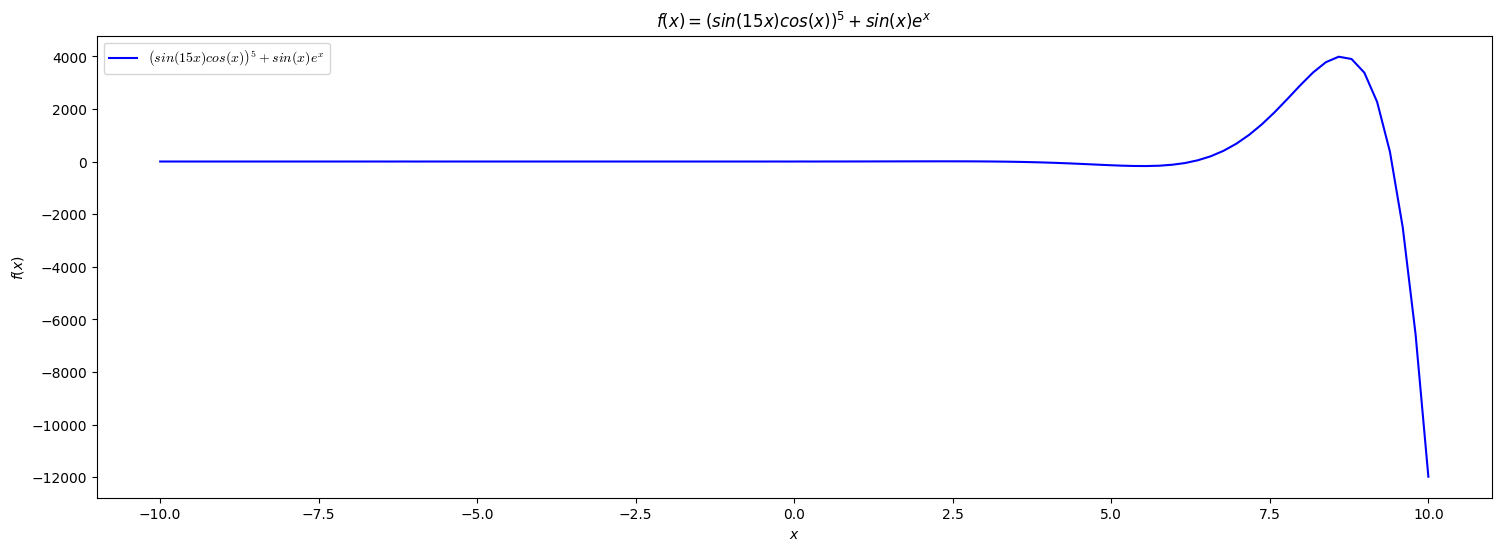

In [67]:
# (1): Figure instance:
figure = plt.figure(figsize = (18, 6))

# (2): Add an Axes Object:
axis_1 = figure.add_subplot(1, 1, 1)

# (3): Make some random data:
x1 = np.linspace(-10, 10, 100)
y1 = np.power(np.sin(15 * x1) * np.cos(x1), 5) + np.sin(x1) * np.exp(x1)

# (4): Customize the Axes Object:
customizer1 = PlotCustomizer(
    axis_1,
    title = r"$f(x) = \left( sin(15 x) cos(x) \right)^{5} + sin(x) e^{x}$",
    xlabel = r"$x$",
    ylabel = r"$f(x)$")

# (5): Add data to the Axes Object:
customizer1.add_line_plot(
    x1, 
    y1, 
    label = r"$\left( sin(15 x) cos(x) \right)^{5} + sin(x) e^{x}$",
    color = 'blue')


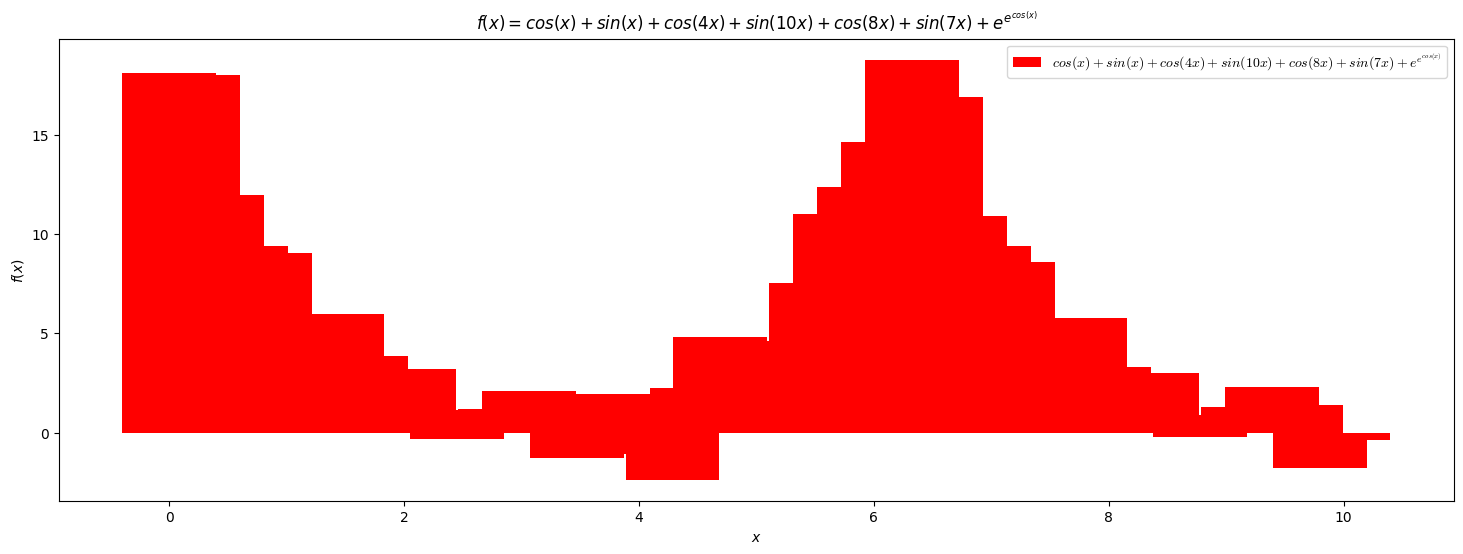

In [68]:
# (1): Figure instance:
figure = plt.figure(figsize = (18, 6))

# (2): Add an Axes Object:
axis_2 = figure.add_subplot(1, 1, 1)

# (3): Make some random data:
x2 = np.linspace(0, 10, 50)
y2 = np.cos(x2) + np.sin(x2) + np.cos(4 * x2) + np.sin(10 * x2) + np.cos(8 * x2) + np.sin(7 * x2) + np.exp(np.exp(np.cos(x2)))

# (4): Customize the Axes Object:
customizer2 = PlotCustomizer(
    axis_2,
    title = r"$f(x) = cos(x) + sin(x) + cos(4x) + sin(10x) + cos(8x) + sin(7x) + e^{e^{cos(x)}}$",
    xlabel = r"$x$",
    ylabel = r"$f(x)$")

# (5): Add data to the Axes Object:
customizer2.add_bar_plot(
    x2, 
    y2, 
    label = r"$cos(x) + sin(x) + cos(4x) + sin(10x) + cos(8x) + sin(7x) + e^{e^{cos(x)}}$",
    color = 'red')


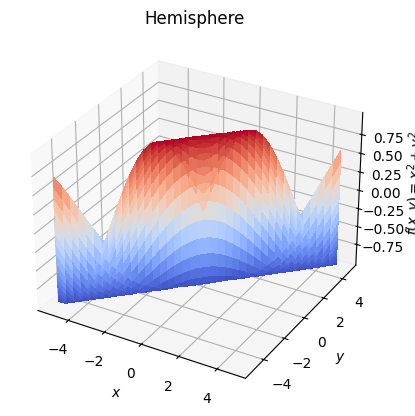

In [76]:
# (1): Define a Surface in R3:
def hemisphere(x, y):
    return np.sqrt(x**2 + y**2)

# (1): Figure instance:
figure = plt.figure()

# (2): Add an Axes Object:
axis_3 = figure.add_subplot(projection = "3d")

# (3): Make some random data:
x3 = np.arange(-5, 5, 0.25)
y3 = np.arange(-5, 5, 0.25)
X3, Y3 = np.meshgrid(x3, y3)
R = np.sqrt(X3**2 + Y3**2)
z3 = np.sin(R)

# (4): Customize the Axes Object:
customizer3 = PlotCustomizer(
    axis_3,
    title = r"Hemisphere",
    xlabel = r"$x$",
    ylabel = r"$y$",
    zlabel = r"$f(x, y) = x^{2} + y^{2}$",
    grid = True)

# (5): Add data to the Axes Object:
customizer3.add_surface_plot(
    x3,
    y3,
    z3,
    colormap = 'coolwarm')
